In [7]:
import json

data = {}
for name in ["train", "test", "dev"]:
    with open(f"{name}.json") as file:
        data[name] = json.load(file)

In [8]:
print(f"Train: {len(data['train'])}")
print(f"Dev: {len(data['dev'])}")
print(f"Test: {len(data['test'])}")

Train: 8634
Dev: 1531
Test: 1272


In [16]:
for name in ["train", "test", "dev"]:
    print(json.dumps(data[name][1], indent=2))

{
  "sent_id": "201911-02-01",
  "text": "Med integrerte h\u00f8yttalere som p\u00e5 ingen m\u00e5te er diskret plassert , og med en stor subwoofer inkludert , da snakker vi om en gutteskjerm .",
  "opinions": []
}
{
  "sent_id": "201344-02-01",
  "text": "Garmin Fenix Chronos er meget god tur- og treningskamerat , og mye flottere enn vanlige smartklokker .",
  "opinions": [
    {
      "Source": [
        [],
        []
      ],
      "Target": [
        [
          "Garmin Fenix Chronos"
        ],
        [
          "0:20"
        ]
      ],
      "Polar_expression": [
        [
          "meget god tur- og treningskamerat"
        ],
        [
          "24:57"
        ]
      ],
      "Polarity": "Positive",
      "Intensity": "Strong",
      "NOT": false,
      "Source_is_author": true,
      "Target_is_general": false,
      "Type": "E"
    },
    {
      "Source": [
        [],
        []
      ],
      "Target": [
        [
          "Garmin Fenix Chronos"
        ],
        

In [9]:
polarities = {}
for name in ["train", "dev", "test"]:
    temp_polarities = {}
    for item in data[name]:
        current_opinions = item["opinions"]
        if current_opinions:
            for opinion in current_opinions:
                polarity = opinion["Polarity"]
                if polarity not in ["Positive", "Negative"]:
                    continue
                if polarity not in temp_polarities:
                    temp_polarities[polarity] = 1
                else:
                    temp_polarities[polarity] += 1
        else:
            if "None" not in temp_polarities:
                temp_polarities["None"] = 1
            else:
                temp_polarities["None"] += 1
    polarities[name] = temp_polarities

In [10]:
print(json.dumps(polarities, indent=4))

{
    "train": {
        "None": 4079,
        "Negative": 2752,
        "Positive": 5694
    },
    "dev": {
        "None": 710,
        "Positive": 988,
        "Negative": 444
    },
    "test": {
        "None": 598,
        "Positive": 876,
        "Negative": 359
    }
}


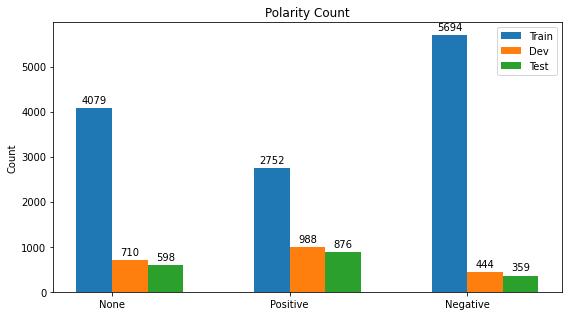

In [11]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["None", "Positive", "Negative"]
train = polarities["train"].values()
dev = polarities["dev"].values()
test = polarities["test"].values()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
# Set plot size
fig.set_size_inches(16/2, 9/2)
rects1 = ax.bar(x - width / 2, train, width, label='Train')
rects2 = ax.bar(x + width / 2, dev, width, label='Dev')
rects3 = ax.bar(x + width / 2 + width, test, width, label='Test')

ax.set_ylabel('Count')
ax.set_title('Polarity Count')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

In [12]:
positive_texts = ""
negative_texts = ""
for name in ["train", "dev", "test"]:
    for item in data[name]:
        current_opinions = item["opinions"]
        if current_opinions:
            for opinion in current_opinions:
                polarity = opinion["Polarity"]
                if polarity == "Positive":
                    positive_texts += item["text"]
                elif polarity == "Negative":
                    negative_texts += item["text"]

In [13]:
from wordcloud import WordCloud

with open("no_stopwords.json", encoding="utf-8") as file:
    stopwords = json.load(file)

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)

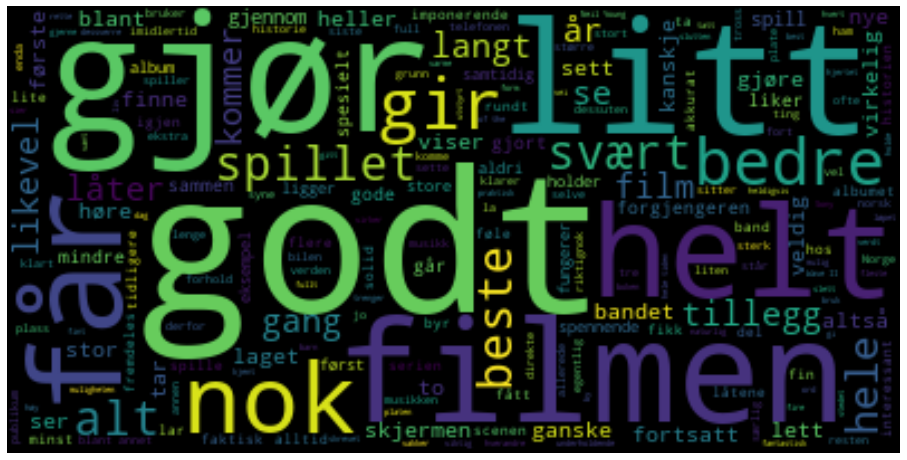

In [14]:
plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

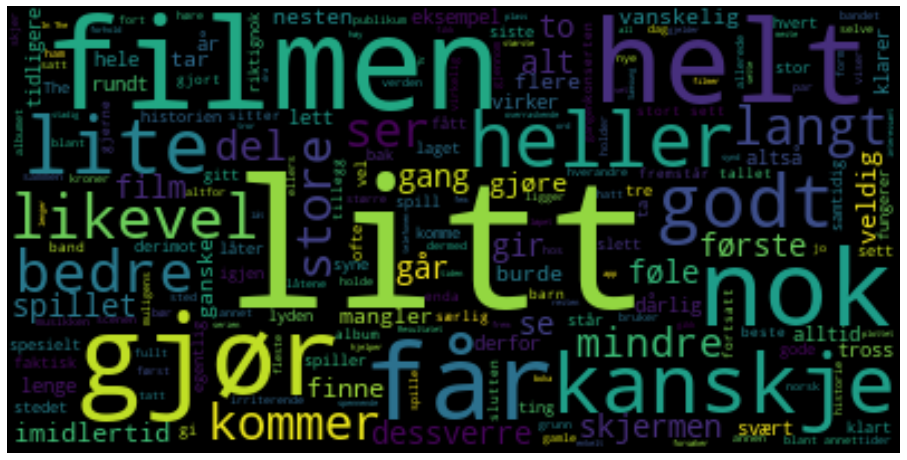

In [15]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()